# Dividir el dataset en conjunto de entrenamiento y de testing  

In [1]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ("./Documents/Python Scripts/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len (data))

(array([ 8., 16., 22., 28., 46., 26., 27., 21.,  4.,  2.]),
 array([-2.21882297, -1.73019763, -1.24157229, -0.75294695, -0.2643216 ,
         0.22430374,  0.71292908,  1.20155442,  1.69017976,  2.17880511,
         2.66743045]),
 <a list of 10 Patch objects>)

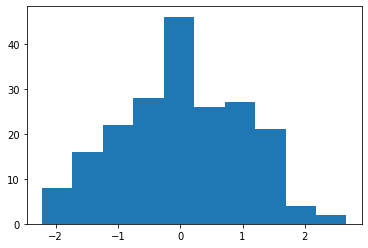

In [15]:
plt.hist(a)

In [8]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [10]:
len(training), len(testing)

(154, 46)

In [11]:
lm = smf.ols(formula= "Sales~ TV+Radio", data=training).fit()

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     785.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.57e-80
Time:                        16:26:51   Log-Likelihood:                -287.87
No. Observations:                 154   AIC:                             581.7
Df Residuals:                     151   BIC:                             590.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0875      0.304     10.158      0.000       2.487       3.688
TV             0.0454      0.001     30.368      0.000       0.042       0.048
Radio          0.1884      0.009     21.682      0.000       0.171       0.206
==============================================================================
Omnibus:                       21.238   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.271
Skew:                          -0.935   Prob(JB):                     3.26e-06
Kurtosis:                       3.667   Cond. No.                         403.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0875 + 0.0454 * TV + 0.1884*radio

# Validacion del modelo con el conjunto testing

In [17]:
sales_pred = lm.predict(testing)
sales_pred

2      12.517418
9      12.644992
12     10.781807
22      6.682717
23     16.633091
25     15.678269
27     17.130925
28     19.485524
31     11.490084
39     20.539005
40     16.479773
41     17.414173
42     21.631757
47     21.795134
57     12.886704
67     12.141729
74     17.407860
83     14.577225
87     15.762024
88     11.900012
95     16.453232
99     17.081196
102    17.707096
103    14.856140
105    18.089394
107     7.246656
111    21.217288
114    15.455390
118    15.745549
121     8.029809
127     6.727215
130    10.581429
137    20.954757
141    18.548951
143     8.908668
147    23.358191
149     9.977834
163    17.442191
165    14.370541
166    10.985143
168    17.310188
169    17.987387
174    13.821404
177    12.281530
186     9.814163
196     8.285931
dtype: float64

In [18]:
SSD = sum((testing["Sales"]- sales_pred)**2)
SSD

181.0516302692958

In [20]:
RSE = np.sqrt(SSD/len(testing)-3)
RSE

0.9674218344932353

In [21]:
Sales_mean= np.mean(testing["Sales"])
error = RSE /Sales_mean
error

0.06800336856156605